In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

print(os.listdir(('/content/drive/MyDrive/compara_segmentadores/data2/talho/G1020/train/images/')))

In [ ]:
!pip install torch torchvision opencv-python
!pip install scikit-plot
!pip install django-model-utils
!pip install efficientnet_pytorch




G1020:


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 187MB/s]


Loaded pretrained weights for efficientnet-b0
Epoch [1/3], Train Accuracy: 30.15%, Validation Accuracy: 18.33%, Loss: 0.6268
Epoch [2/3], Train Accuracy: 29.04%, Validation Accuracy: 17.78%, Loss: 0.6013
Epoch [3/3], Train Accuracy: 31.37%, Validation Accuracy: 26.11%, Loss: 0.5830
Fim do treino.
Acurácia: 0.20666666666666667
Precisão: 0.16428571428571428
Recall: 0.92
F1-score: 0.2787878787878788
True Negative (TN): 16
False Positive (FP): 234
False Negative (FN): 4
True Positive (TP): 46


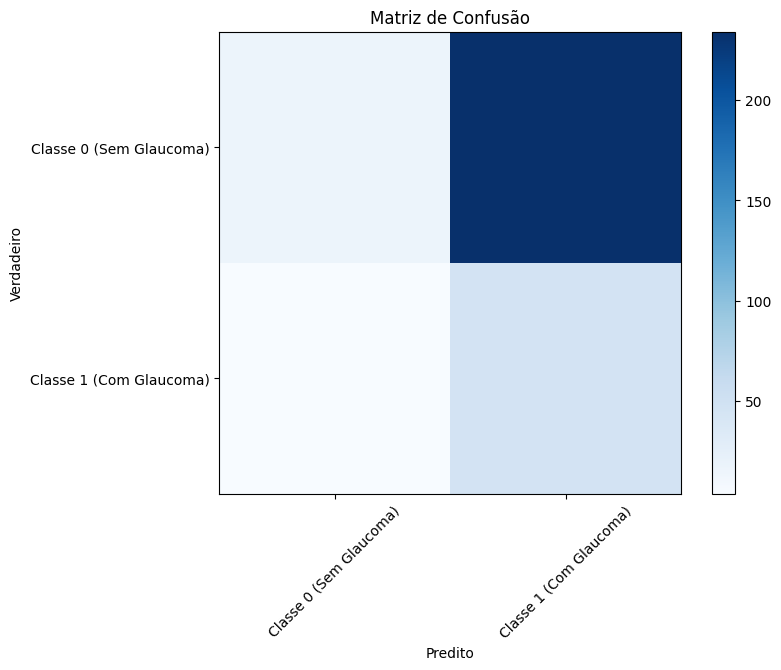

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.80      0.06      0.12       250
Classe 1 (Com Glaucoma)       0.16      0.92      0.28        50

               accuracy                           0.21       300
              macro avg       0.48      0.49      0.20       300
           weighted avg       0.69      0.21      0.15       300



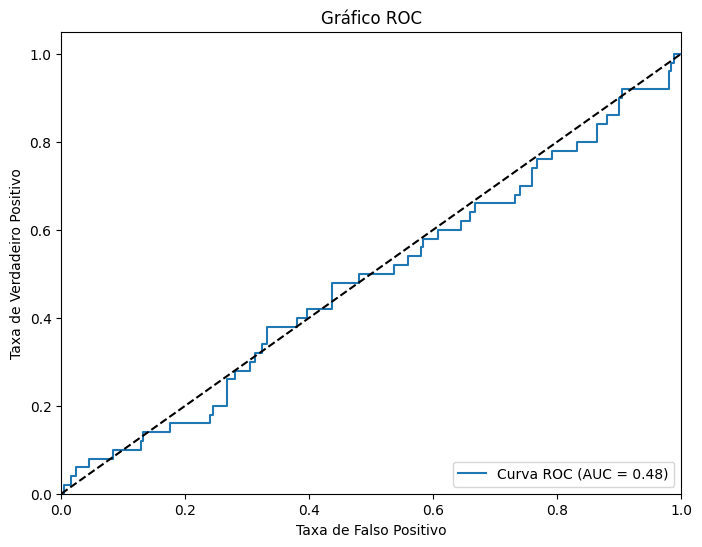

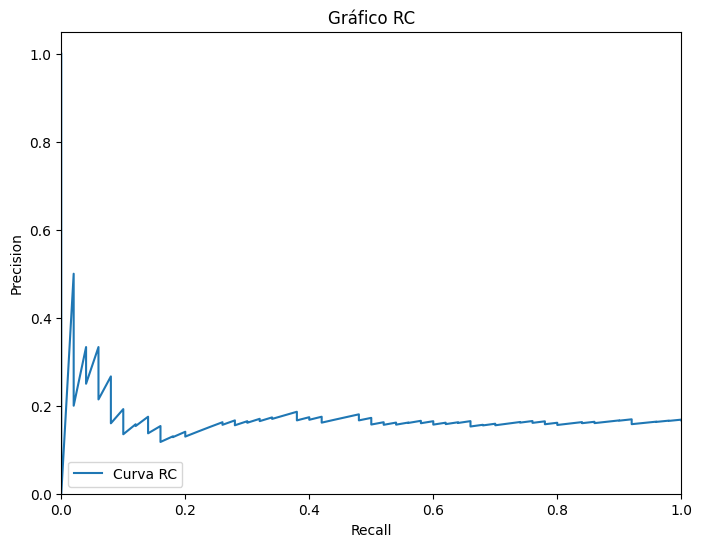

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.80      0.06      0.12       250
Classe 1 (Com Glaucoma)       0.16      0.92      0.28        50

               accuracy                           0.21       300
              macro avg       0.48      0.49      0.20       300
           weighted avg       0.69      0.21      0.15       300

Fim do teste.




ORIGA:
Loaded pretrained weights for efficientnet-b0
Epoch [1/3], Train Accuracy: 35.95%, Validation Accuracy: 42.22%, Loss: 0.5773
Epoch [2/3], Train Accuracy: 23.85%, Validation Accuracy: 16.67%, Loss: 0.5082
Epoch [3/3], Train Accuracy: 23.85%, Validation Accuracy: 16.67%, Loss: 0.4638
Fim do treino.
Acurácia: 0.18666666666666668
Precisão: 0.1678082191780822
Recall: 0.98
F1-score: 0.28654970760233917
True Negative (TN): 7
False Positive (FP): 243
False Negative (FN): 1
True Positive (TP): 49


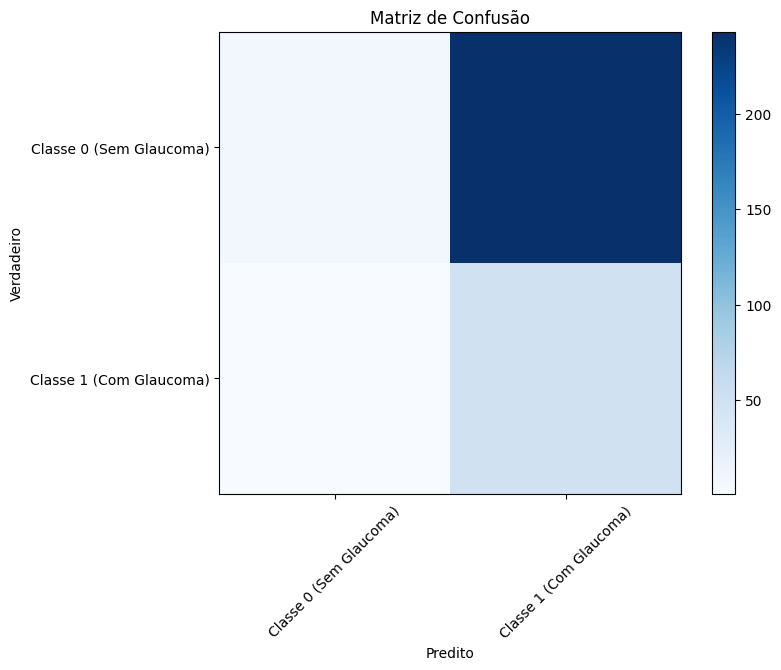

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.88      0.03      0.05       250
Classe 1 (Com Glaucoma)       0.17      0.98      0.29        50

               accuracy                           0.19       300
              macro avg       0.52      0.50      0.17       300
           weighted avg       0.76      0.19      0.09       300



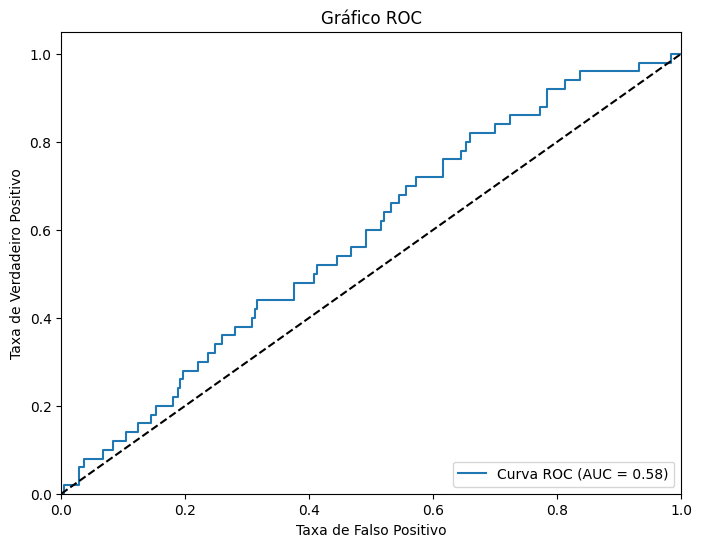

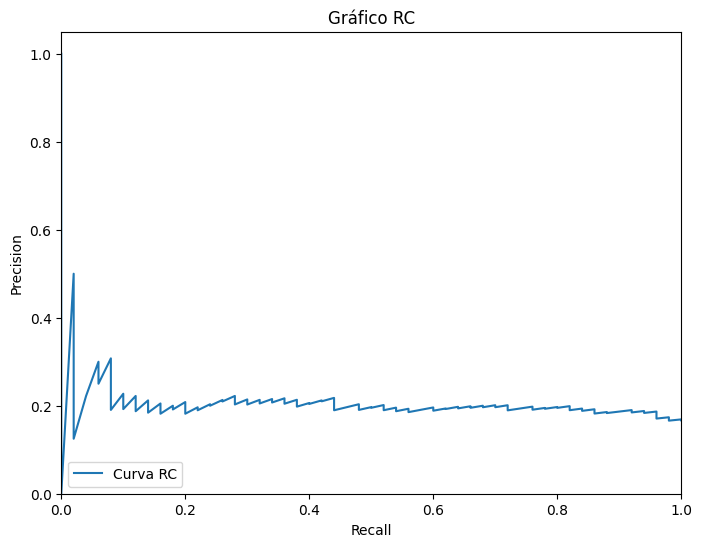

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.88      0.03      0.05       250
Classe 1 (Com Glaucoma)       0.17      0.98      0.29        50

               accuracy                           0.19       300
              macro avg       0.52      0.50      0.17       300
           weighted avg       0.76      0.19      0.09       300

Fim do teste.




REFUGE:
Loaded pretrained weights for efficientnet-b0
Epoch [1/3], Train Accuracy: 15.43%, Validation Accuracy: 56.67%, Loss: 0.3858
Epoch [2/3], Train Accuracy: 56.46%, Validation Accuracy: 74.44%, Loss: 0.2908
Epoch [3/3], Train Accuracy: 76.81%, Validation Accuracy: 80.56%, Loss: 0.2573
Fim do treino.
Acurácia: 0.5966666666666667
Precisão: 0.1414141414141414
Recall: 0.28
F1-score: 0.18791946308724833
True Negative (TN): 165
False Positive (FP): 85
False Negative (FN): 36
True Positive (TP): 14


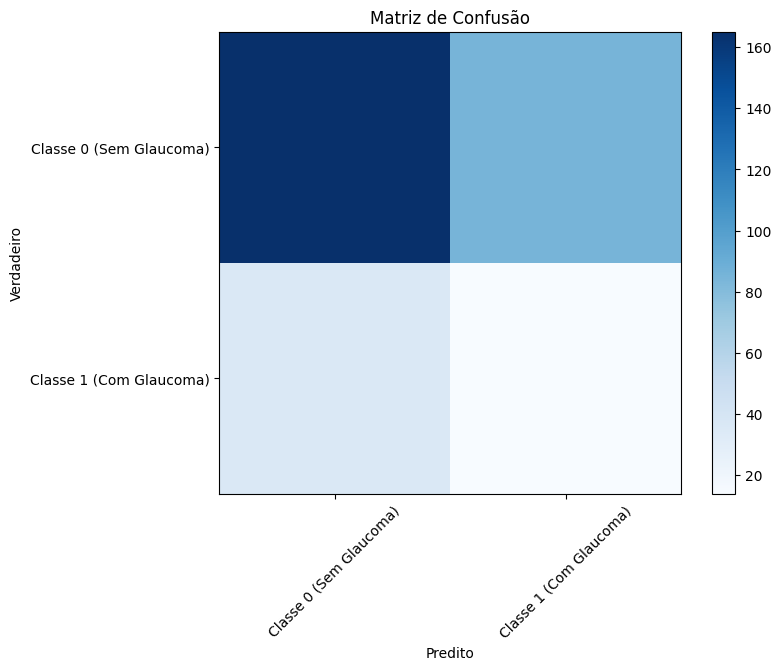

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.82      0.66      0.73       250
Classe 1 (Com Glaucoma)       0.14      0.28      0.19        50

               accuracy                           0.60       300
              macro avg       0.48      0.47      0.46       300
           weighted avg       0.71      0.60      0.64       300



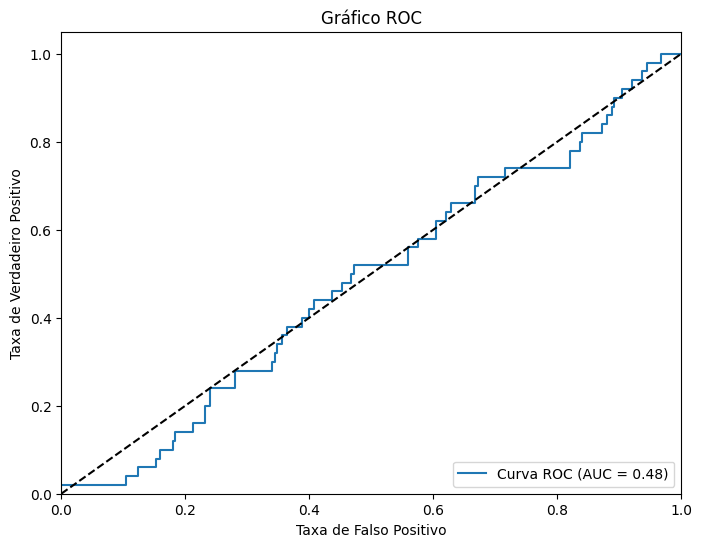

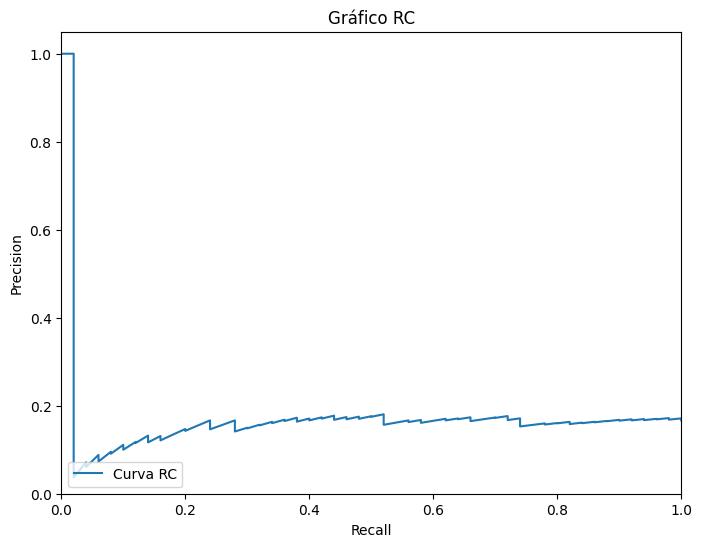

Relatório de Classificação:
                         precision    recall  f1-score   support

Classe 0 (Sem Glaucoma)       0.82      0.66      0.73       250
Classe 1 (Com Glaucoma)       0.14      0.28      0.19        50

               accuracy                           0.60       300
              macro avg       0.48      0.47      0.46       300
           weighted avg       0.71      0.60      0.64       300

Fim do teste.




In [3]:
#EfficientNet
modelo = "EfficientNet"

import os
import torch
import torchvision
from torchvision import transforms
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from efficientnet_pytorch import EfficientNet


# Função para carregar as imagens e anotações
def load_data(root_dir):
    image_dir_train = os.path.join(root_dir, 'train/images')
    annotation_dir_train = os.path.join(root_dir, 'train/anotacoes')


    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Redimensionar todas as imagens para o tamanho 224x224
        transforms.ToTensor()
    ])

    train_data = torchvision.datasets.ImageFolder(
        root=image_dir_train,
        transform=transform
    )
    train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=16,
        shuffle=True
    )
    return train_loader

def test_load_data(root_dir):
    image_dir_test = os.path.join(root_dir, 'test/images')
    annotation_dir_test = os.path.join(root_dir, 'test/anotacoes')

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Redimensionar todas as imagens para o tamanho 224x224
        transforms.ToTensor()
    ])
    test_data = torchvision.datasets.ImageFolder(
        root=image_dir_test,
        transform=transform
    )
    test_loader = torch.utils.data.DataLoader(
        test_data,
        batch_size=16,
        shuffle=False
    )

    return test_loader

def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

def validation_load_data(root_dir):  # Corrigir o nome do parâmetro para root_dir
    image_dir_val = os.path.join(root_dir, 'valid/images')
    annotation_dir_val = os.path.join(root_dir, 'valid/anotacoes')

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    val_data = torchvision.datasets.ImageFolder(
        root=image_dir_val,
        transform=transform
    )
    val_loader = torch.utils.data.DataLoader(
        val_data,
        batch_size=16,
        shuffle=False
    )

    return val_loader

def train_model(train_loader, val_loader, num_epochs,MODELO):
    model = EfficientNet.from_pretrained('efficientnet-b0')  # Carrega o modelo EfficientNet-B0 pré-treinado
    num_ftrs = model._fc.in_features
    model._fc = nn.Linear(num_ftrs, 2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    best_accuracy = 0.0  # Track the best test accuracy
    train_accuracies = []  # List to store train accuracies
    train_losses = []  # List to store train losses

    best_val_accuracy = 0.0  # Track the best validation accuracy
    val_accuracies = []  # List to store validation accuracies



    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        train_accuracy = evaluate_model(model, train_loader)
        train_accuracies.append(train_accuracy)

        # Validation after each epoch
        model.eval()
        val_accuracy = evaluate_model(model, val_loader)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.2%}, Validation Accuracy: {val_accuracy:.2%}, Loss: {epoch_loss:.4f}')

        # Save the best model based on the highest validation accuracy
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model_state = model.state_dict()

    # Save the best model checkpoint
    torch.save(best_model_state, MODELO)

    return model


def test_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Define o dispositivo de execução
    model.eval()
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            # Obter as probabilidades de saída (scores)
            scores = F.softmax(outputs, dim=1)
            y_scores.extend(scores[:, 1].cpu().numpy())

    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    print("True Negative (TN):", tn)
    print("False Positive (FP):", fp)
    print("False Negative (FN):", fn)
    print("True Positive (TP):", tp)
    class_names = ['Classe 0 (Sem Glaucoma)', 'Classe 1 (Com Glaucoma)']

    # Plot da matriz de confusão
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    # Relatório de classificação
    print("Relatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Calcular as estatísticas ROC
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    # Plot do gráfico ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Gráfico ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Calcular as estatísticas RC
    precision, recall, thresholds_rc = precision_recall_curve(y_true, y_scores)

    # Plot do gráfico RC
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Curva RC')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Gráfico RC')
    plt.legend(loc='lower left')
    plt.show()

    # Relatório de classificação
    print("Relatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=class_names))


Valid_root = "/content/drive/MyDrive/compara_segmentadores/data2/talho/ORIGA/"
Teste_root = "/content/drive/MyDrive/compara_segmentadores/data2/talho/G1020/"
num_epochs = 3

Val_loader = validation_load_data(Valid_root)
Test_loader = test_load_data(Teste_root)

print('\n')
# Carregar os dados para G1020
print("G1020:")
TrainG1020_root = "/content/drive/MyDrive/compara_segmentadores/data2/talho/G1020/"
Train_loader_G1020 = load_data(TrainG1020_root)
G1020M = 'G1020best_model.pth'
MG1020M = modelo+G1020M
modelo_G1020 = train_model(Train_loader_G1020, Val_loader, num_epochs,MG1020M)
print("Fim do treino.")
melhor_estado_modelo_G1020 = torch.load(MG1020M)
modelo_G1020.load_state_dict(melhor_estado_modelo_G1020)
test_model(modelo_G1020, Test_loader)
print("Fim do teste.")
print('\n')

print('\n')
# Carregar os dados para ORIGA
print("ORIGA:")
TrainORIGA_root = "/content/drive/MyDrive/compara_segmentadores/data2/talho/ORIGA/"
train_loader_ORIGA = load_data(TrainORIGA_root)
ORIGM = 'ORIGAbest_model.pth'
MORIGM = modelo+ORIGM
modelo_ORIGA = train_model(train_loader_ORIGA, Val_loader, num_epochs,MORIGM)
print("Fim do treino.")
melhor_estado_modelo_ORIGA = torch.load(MORIGM)
modelo_ORIGA.load_state_dict(melhor_estado_modelo_ORIGA)
test_model(modelo_ORIGA, Test_loader)
print("Fim do teste.")
print('\n')

print('\n')
# Carregar os dados para REFUGE
print("REFUGE:")
TrainREFUGE_root = "/content/drive/MyDrive/compara_segmentadores/data2/talho/REFUGE/"
train_loader_REFUGE = load_data(TrainREFUGE_root)
REFUM = 'REFUGEbest_model.pth'
MREFUM = modelo+REFUM
modelo_REFUGE = train_model(train_loader_REFUGE, Val_loader, num_epochs,MREFUM)
print("Fim do treino.")
melhor_estado_modelo_REFUGE = torch.load(MREFUM)
modelo_REFUGE.load_state_dict(melhor_estado_modelo_REFUGE)
test_model(modelo_REFUGE, Test_loader)
print("Fim do teste.")
print('\n')
